In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import j1  # Bessel function of first kind

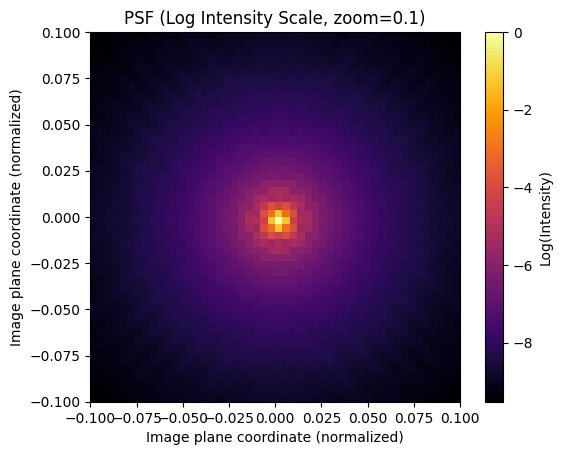

In [3]:
def simulate_psf(grid_size=512, aberration_strength=15, zoom=0.1):
    x = np.linspace(-1, 1, grid_size)
    y = np.linspace(-1, 1, grid_size)
    X, Y = np.meshgrid(x, y)
    R = np.sqrt(X**2 + Y**2)

    aperture = (R <= 1).astype(float)
    phase_aberration = aberration_strength * (R**14)
    pupil_function = aperture * np.exp(1j * 2 * np.pi * phase_aberration)

    fft_pupil = np.fft.fftshift(np.fft.fft2(pupil_function))
    psf = np.abs(fft_pupil)**2
    psf /= psf.max()

    center = grid_size // 2
    zoom_size = int(grid_size * zoom)
    half_zoom = zoom_size // 2
    psf_zoom = psf[center - half_zoom:center + half_zoom,
                   center - half_zoom:center + half_zoom]

    zoom_extent = (-zoom, zoom, -zoom, zoom)

    plt.imshow(np.log(psf_zoom + 1e-8), extent=zoom_extent, cmap='inferno')
    plt.title(f'PSF (Log Intensity Scale, zoom={zoom})')
    plt.colorbar(label='Log(Intensity)')
    plt.xlabel('Image plane coordinate (normalized)')
    plt.ylabel('Image plane coordinate (normalized)')
    plt.show()

simulate_psf()